<a href="https://colab.research.google.com/github/taejoonlab/BME603-Proteomics/blob/main/psm/TargetDecoyDistribution-Python3.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

In [1]:
# Download the COMET output for iPRG2009
!curl -O https://pub.taejoonlab.org/BME603/ABRF_iPRG2009/comet.iPRG2009_Study/iPRG2009_ECOLI_blue_1.iPRG2009_Study.pin.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9559k  100 9559k    0     0  8407k      0  0:00:01  0:00:01 --:--:-- 8414k


In [2]:
# Check whether the file is arrived.
!ls -lh

total 9.4M
-rw-r--r-- 1 taejoon taejoon  10K Mar 24 15:18 TargetDecoyDistribution-Python3.ipynb
-rw-r--r-- 1 taejoon taejoon 9.4M Mar 24 15:21 iPRG2009_ECOLI_blue_1.iPRG2009_Study.pin.txt


In [3]:
# Check the format of the file.
! head iPRG2009_ECOLI_blue_1.iPRG2009_Study.pin.txt

SpecId	Label	ScanNr	ExpMass	CalcMass	lnrSp	deltLCn	deltCn	lnExpect	Xcorr	Sp	IonFrac	Mass	PepLen	Charge1	Charge2	Charge3	Charge4	Charge5	Charge6	enzN	enzC	enzInt	lnNumSP	dM	absdM	Peptide	Proteins
../mzXML/iPRG2009_ECOLI_blue_1_37_3_1	1	37	925.672276	925.655699	0.693147	0.999999	0.844052	6.906755	0.017384	7.732907	0.0714	925.672276	8	0	0	1	0	0	0	1	1	1	1.098612	0.000018	0.000018	R.RIALILVK.K	P39414
../mzXML/iPRG2009_ECOLI_blue_1_37_3_2	-1	37	925.672276	925.655699	0.000000	0.999996	0.999996	6.906755	0.002711	13.698096	0.1071	925.672276	8	0	0	1	0	0	0	1	1	1	1.098612	0.000018	0.000018	K.KVLILAIR.R	rev_P39414
../mzXML/iPRG2009_ECOLI_blue_1_321_2_1	1	321	731.406420	731.404629	0.000000	0.604216	0.405704	-6.053844	1.899519	760.518250	0.8571	731.406420	8	0	1	0	0	0	0	1	1	0	5.934894	0.000002	0.000002	R.VGGAAQTK.I	P0ABB0
../mzXML/iPRG2009_ECOLI_blue_1_321_2_2	-1	321	731.406420	731.415863	1.098612	0.334029	0.132818	-0.408838	1.128876	258.790527	0.7000	731.406420	6	0	1	0	0	0	0	1	0	2	5.934894	0.000002	0

In [4]:
target_list = []
decoy_list = []

f_pin = open('iPRG2009_ECOLI_blue_1.iPRG2009_Study.pin.txt', 'r')
headers = f_pin.readline().strip().split("\t")
for line in f_pin:
    tokens = line.strip().split("\t")
    spec_id = tokens[headers.index('SpecId')]
    scan_num = tokens[headers.index('ScanNr')]
    is_target = int(tokens[headers.index('Label')])
    tmp_xcorr = float(tokens[headers.index('Xcorr')])
    if is_target  > 0:
        target_list.append(tmp_xcorr)
    else:
        decoy_list.append(tmp_xcorr)
f_pin.close()

print("Number of targets: %d" % len(target_list))
print("Number of decoys: %d" % len(decoy_list))

Number of targets: 24613
Number of decoys: 19069


In [5]:
target_list = []
decoy_list = []

f_pin = open('iPRG2009_ECOLI_blue_1.iPRG2009_Study.pin.txt', 'r')
best_xcorr = dict()
headers = f_pin.readline().strip().split("\t")
for line in f_pin:
    tokens = line.strip().split("\t")
    spec_id = tokens[headers.index('SpecId')]
    scan_num = tokens[headers.index('ScanNr')]
    is_target = int(tokens[headers.index('Label')])
    tmp_xcorr = float(tokens[headers.index('Xcorr')])
    
    if scan_num not in best_xcorr:
        best_xcorr[scan_num] = {'xcorr': tmp_xcorr, 'is_target': is_target}
    elif best_xcorr[scan_num]['xcorr'] < tmp_xcorr:
        best_xcorr[scan_num] = {'xcorr': tmp_xcorr, 'is_target': is_target}
f_pin.close()

for tmp_scan_num in best_xcorr.keys():
    if best_xcorr[tmp_scan_num]['is_target'] > 0:
        target_list.append(best_xcorr[tmp_scan_num]['xcorr'])
    else:
        decoy_list.append(best_xcorr[tmp_scan_num]['xcorr'])
print("Number of targets: %d" % len(target_list))
print("Number of decoys: %d" % len(decoy_list))

Number of targets: 6648
Number of decoys: 2133


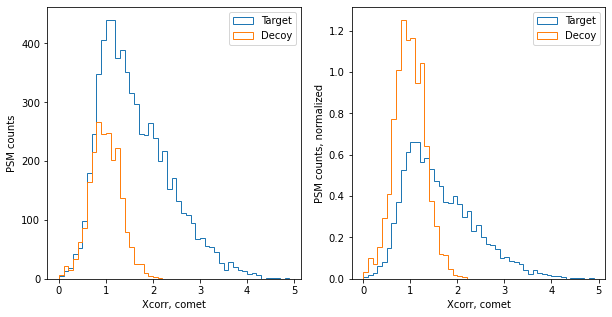

In [14]:
import numpy
import matplotlib.pyplot as plt

hist_bins = numpy.arange(0,5,0.1)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(target_list, bins=hist_bins, histtype='step', label='Target')
ax1.hist(decoy_list, bins=hist_bins, histtype='step', label='Decoy')
ax1.set_xlabel('Xcorr, comet')
ax1.set_ylabel('PSM counts')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.hist(target_list, bins=hist_bins, histtype='step', label='Target', density=True)
ax2.hist(decoy_list, bins=hist_bins, histtype='step', label='Decoy', density=True)
ax2.set_xlabel('Xcorr, comet')
ax2.set_ylabel('PSM counts, normalized')
ax2.legend()
plt.show()

In [17]:
for tmp_xcorr in numpy.arange(2.5, 1.5, -0.05):
    count_target = len([x for x in target_list if x > tmp_xcorr])
    count_decoy = len([x for x in decoy_list if x > tmp_xcorr])
    tmp_FDR = count_decoy * 2 / (count_target + count_decoy)
    print("Target=%d, Decoy=%d, FDR=%0.3f" % (count_target, count_decoy, tmp_FDR))

Target=892, Decoy=0, FDR=0.000
Target=967, Decoy=0, FDR=0.000
Target=1064, Decoy=0, FDR=0.000
Target=1130, Decoy=0, FDR=0.000
Target=1217, Decoy=0, FDR=0.000
Target=1330, Decoy=0, FDR=0.000
Target=1435, Decoy=0, FDR=0.000
Target=1533, Decoy=0, FDR=0.000
Target=1635, Decoy=2, FDR=0.002
Target=1756, Decoy=4, FDR=0.005
Target=1875, Decoy=5, FDR=0.005
Target=2007, Decoy=7, FDR=0.007
Target=2140, Decoy=9, FDR=0.008
Target=2263, Decoy=14, FDR=0.012
Target=2384, Decoy=19, FDR=0.016
Target=2509, Decoy=31, FDR=0.024
Target=2630, Decoy=44, FDR=0.033
Target=2774, Decoy=53, FDR=0.037
Target=2927, Decoy=70, FDR=0.047
Target=3089, Decoy=101, FDR=0.063
